In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
from keras import regularizers

In [3]:
vgg16 = VGG16(include_top=False, weights='imagenet')
for layer in vgg16.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
img = image.load_img(r"/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/antelope/02f4b3be2d.jpg")

In [5]:
img.size

(1640, 1025)

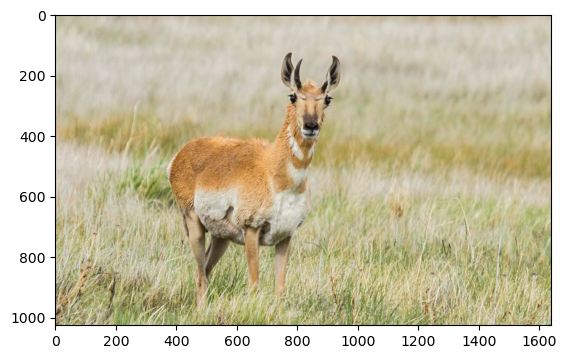

In [6]:
plt.imshow(img)

In [7]:
train_dir = r'/kaggle/input/animal-image-dataset-90-different-animals/animals/animals'
val_dir = r'/kaggle/input/animal-image-dataset-90-different-animals/animals/animals'

In [8]:
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest')

# train_generator = train_datagen.flow_from_directory(
#     train_dir,
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical')

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset='training',
  image_size=(224, 224),
  batch_size=32,
  seed=42,
  shuffle=True)
train_data.cache()
val_data = tf.keras.utils.image_dataset_from_directory(
  val_dir,
  validation_split=0.2,
  subset='validation',
  image_size=(224, 224),
  batch_size=32,
  seed=42,
  shuffle=False)
val_data.cache()

Found 5400 files belonging to 90 classes.
Using 4320 files for training.
Found 5400 files belonging to 90 classes.
Using 1080 files for validation.


<CacheDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
classnames = train_data.class_names
print(classnames)           

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


In [11]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.applications.vgg16.preprocess_input(inputs)
x = vgg16(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(90, kernel_regularizer=regularizers.l2(0.01))(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [13]:
# len(train_generator)

In [14]:
len(val_data)

34

In [15]:
history = model.fit(train_data, validation_data=val_data, epochs = 15)

Epoch 1/15
135/135 [==============================] - 61s 324ms/step - loss: 13.2510 - accuracy: 0.1097 - val_loss: 3.8954 - val_accuracy: 0.5185
Epoch 2/15
135/135 [==============================] - 32s 225ms/step - loss: 5.3626 - accuracy: 0.4243 - val_loss: 2.1802 - val_accuracy: 0.7731
Epoch 3/15
135/135 [==============================] - 31s 220ms/step - loss: 3.4988 - accuracy: 0.5954 - val_loss: 1.7585 - val_accuracy: 0.8398
Epoch 4/15
135/135 [==============================] - 31s 219ms/step - loss: 2.6509 - accuracy: 0.6907 - val_loss: 1.6002 - val_accuracy: 0.8583
Epoch 5/15
135/135 [==============================] - 29s 209ms/step - loss: 2.1504 - accuracy: 0.7546 - val_loss: 1.2842 - val_accuracy: 0.9315
Epoch 6/15
135/135 [==============================] - 30s 211ms/step - loss: 1.8680 - accuracy: 0.7838 - val_loss: 1.2151 - val_accuracy: 0.9435
Epoch 7/15
135/135 [==============================] - 30s 215ms/step - loss: 1.5803 - accuracy: 0.8181 - val_loss: 1.1020 - val_a

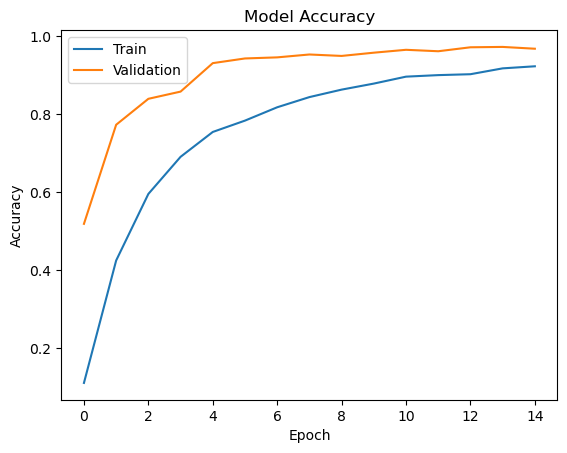

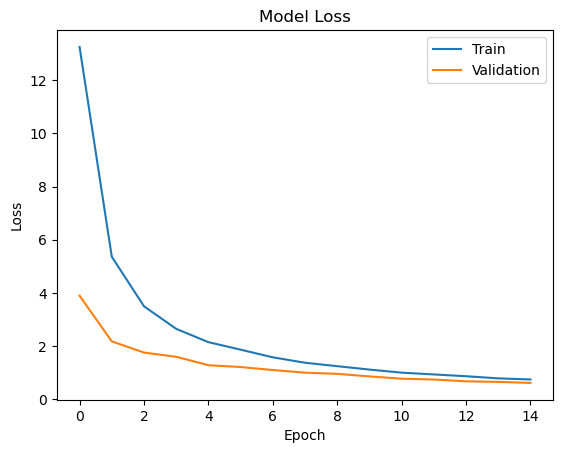

In [17]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Text(0, 0.5, 'Accuracy')

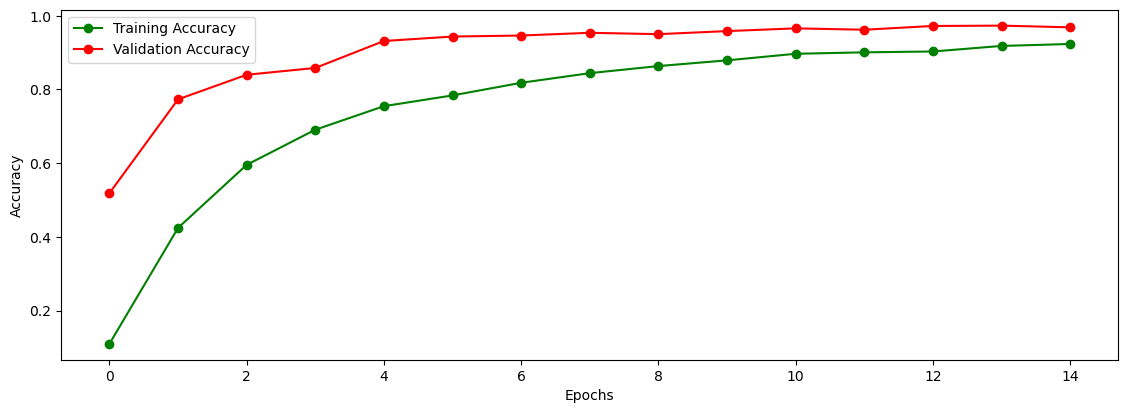

In [18]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['accuracy']
x_val_acc = history.history['val_accuracy']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

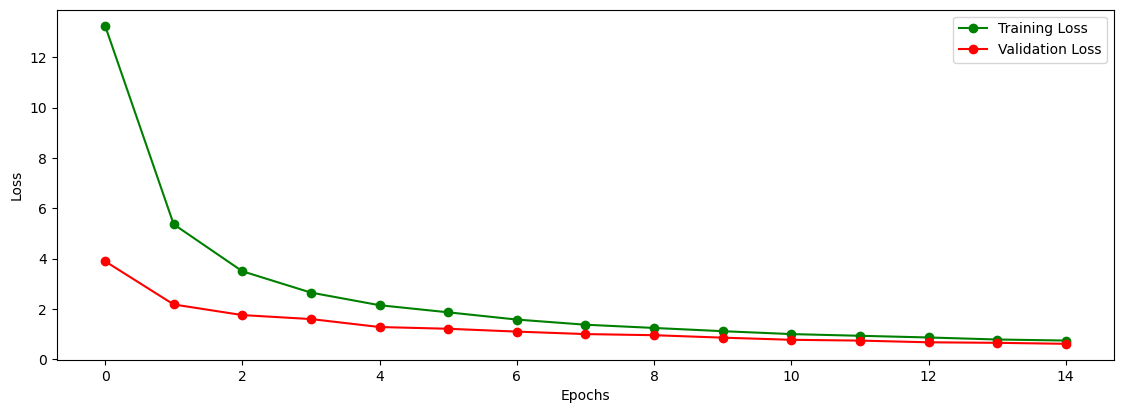

In [19]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['loss']
x_val_acc = history.history['val_loss']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Loss')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [20]:
vgg16.trainable = True
for layer in vgg16.layers[:14]:
    layer.trainable = False
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 512)               0     

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
history = model.fit(train_data, validation_data=val_data, epochs=5)

Epoch 1/5
135/135 [==============================] - 37s 230ms/step - loss: 0.6697 - accuracy: 0.9398 - val_loss: 0.5914 - val_accuracy: 0.9694
Epoch 2/5
135/135 [==============================] - 32s 228ms/step - loss: 0.6165 - accuracy: 0.9530 - val_loss: 0.5787 - val_accuracy: 0.9713
Epoch 3/5
135/135 [==============================] - 32s 227ms/step - loss: 0.5817 - accuracy: 0.9655 - val_loss: 0.5749 - val_accuracy: 0.9750
Epoch 4/5
135/135 [==============================] - 31s 223ms/step - loss: 0.5540 - accuracy: 0.9736 - val_loss: 0.5664 - val_accuracy: 0.9750
Epoch 5/5
135/135 [==============================] - 31s 225ms/step - loss: 0.5392 - accuracy: 0.9789 - val_loss: 0.5707 - val_accuracy: 0.9741


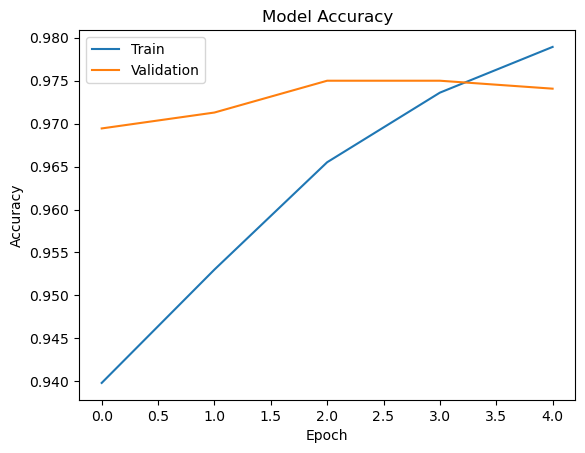

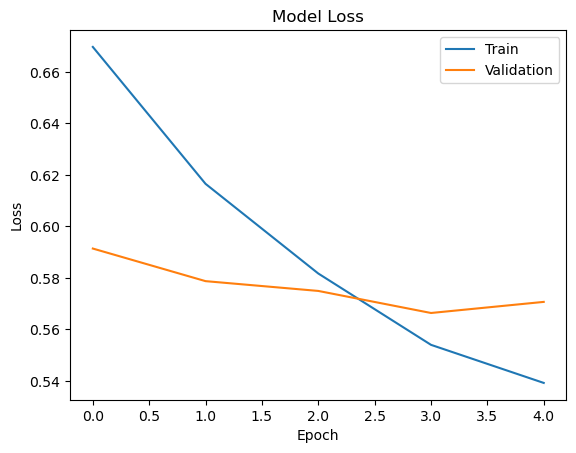

In [27]:
# Plot the accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Text(0, 0.5, 'Accuracy')

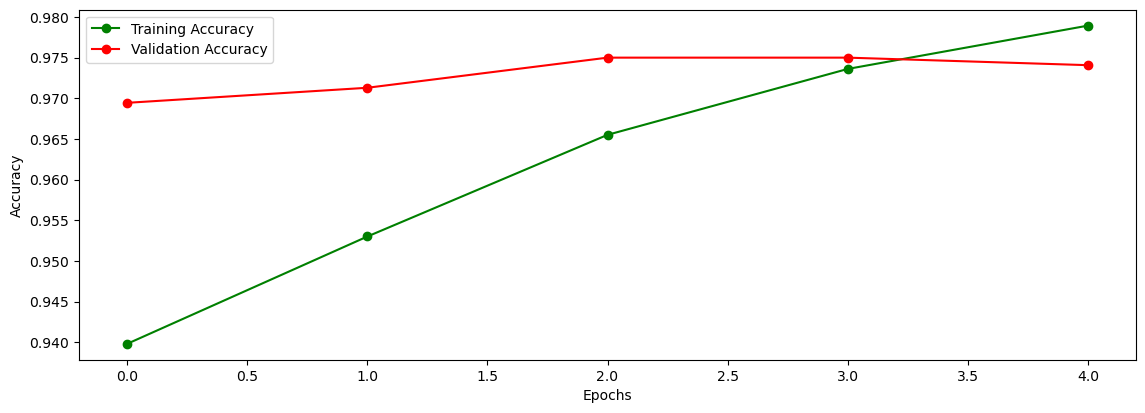

In [28]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['accuracy']
x_val_acc = history.history['val_accuracy']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Accuracy')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

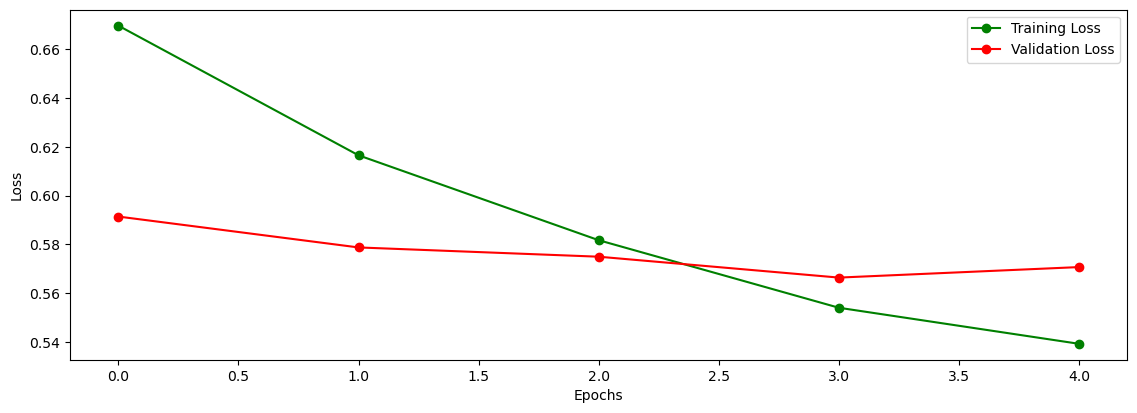

In [29]:
plt.figure(figsize = (30,10))
plt.subplot(2,2,2)
x_train_acc = history.history['loss']
x_val_acc = history.history['val_loss']
x_epoch = [i for i in range(len(x_val_acc))]
plt.plot(x_epoch , x_train_acc , 'go-' , label = 'Training Loss')
plt.plot(x_epoch , x_val_acc , 'ro-' , label = 'Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [31]:
import random
from glob import glob

1/1 [==============================] - 0s 23ms/step


(-0.5, 223.5, 223.5, -0.5)

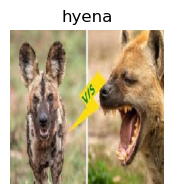

In [51]:
img_name = random.choice(glob(r'/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/*/*.jpg'))

img = tf.keras.utils.load_img(
    img_name, target_size=(224, 224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # ------------------------------------------------USE VALIDATION

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

# print(
#     "{} most likely belongs to {} with a {:.2f} percent confidence."
#     .format(img_name, val_data.class_names[np.argmax(score)], 100 * np.max(score))
# )

plt.figure(figsize=(2, 2))
plt.imshow((img_array[0].numpy()).astype('uint8'))
plt.title("{}".format(val_data.class_names[np.argmax(score)]))
plt.axis('off')